In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
path_to_file = r'D:\university\VSCODE\project\Walmart_sales\Walmart_sales.csv'
df = pd.read_csv(path_to_file)

In [13]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [14]:
def rename_coluns(name):
    new_name = name.lower().replace(' ','_')
    return new_name
df.rename(columns=rename_coluns,inplace=True)
df

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [31]:
df.date = pd.to_datetime(df['date'], format='%d-%m-%Y')

In [32]:
df.dtypes

store                    int64
date            datetime64[ns]
weekly_sales           float64
holiday_flag             int64
temperature            float64
fuel_price             float64
cpi                    float64
unemployment           float64
dtype: object

In [47]:
df['week'] = df['date'].dt.strftime('%U').astype(int)
df['year'] = df.date.dt.year
df.week = df.week - 1
df.sort_values(['year'])

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,week,year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,4,2010
4591,33,2010-05-21,294264.20,0,82.80,3.120,126.184387,9.849,19,2010
4590,33,2010-05-14,331173.51,0,76.80,3.145,126.208548,9.849,18,2010
4589,33,2010-05-07,326870.13,0,75.40,3.127,126.289800,9.849,17,2010
4588,33,2010-04-30,275883.23,0,73.29,3.105,126.380567,9.849,16,2010
...,...,...,...,...,...,...,...,...,...,...
4574,32,2012-10-19,1199292.06,0,53.57,3.750,199.148196,7.557,41,2012
4575,32,2012-10-26,1219979.29,0,47.22,3.686,199.219532,7.557,42,2012
1971,14,2012-03-30,1905033.01,0,50.04,3.953,190.610746,8.424,12,2012
1969,14,2012-03-16,1941040.50,0,50.56,3.862,190.461896,8.424,10,2012


In [54]:
sales = df.groupby(['year', 'week'],as_index=False).agg({'weekly_sales' : 'sum'}).sort_values(['year','week'])
sales

,year,week,weekly_sales
0,2010,4,49750740.50
1,2010,5,48336677.63
2,2010,6,48276993.78
3,2010,7,43968571.13
4,2010,8,46871470.30
...,...,...,...
138,2012,38,43734899.40
139,2012,39,47566639.31
140,2012,40,46128514.25
141,2012,41,45122410.57


<Axes: xlabel='week', ylabel='weekly_sales'>

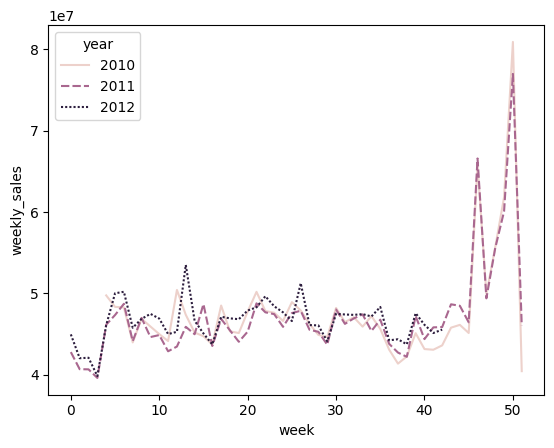

In [59]:
sns.lineplot(data = sales, x = 'week', y = 'weekly_sales', hue='year', style='year')